# Final Project Template 

## 1) Get your data
You may use any data set(s) you like, so long as they meet these criteria:

* Your data must be publically available for free.
* Your data should be interesting to _you_. You want your final project to be something you're proud of.
* Your data should be "big enough":
    - It should have at least 1,000 rows.
    - It should have enough of columns to be interesting.
    - If you have questions, contact a member of the instructional team.

## 2) Provide a link to your data
Your data is required to be free and open to anyone.
As such, you should have a URL which anyone can use to download your data:

In [1]:
# https://www.ncbi.nlm.nih.gov/pubmed/

# 3) Import your data

In the space below, import your data. If your data span multiple files, read them all in. If applicable, merge or append them as needed.

In [1]:
#importing needed packages
import pandas as pd
import numpy as np 
from Bio import Entrez

#searching PubMed for "genomics" and downloading dictionary of data including number of publications, accession IDs, and relevant MeSH term 
Entrez.email = "eileen.cahill@nih.gov"
handle = Entrez.esearch(db="pubmed", retmax=100, term="genom*", idtype="acc")
record = Entrez.read(handle)
handle.close()

#optional print because data size is large
#print(record)

if record['Count'] == '0':
    print("\nYour search did not return any publications. Try another search.\n")
    print("Error list says: " + str(record['ErrorList']) + "\n")
    print("Warning list says: " + str(record['WarningList']))
else:
    print("Search successful.")

Search successful.


In [2]:
#simply showing data type
print(type(record))


<class 'Bio.Entrez.Parser.DictionaryElement'>


In [3]:
#converting all data from type Bio.Entrez.Parser.DictionaryElement to list
list = []
listrecords = []

for key, value in record.items():
    list = [key, value]
    listrecords.append(list)

#optional: examine list of records (large)
#print(listrecords)

print(type(listrecords))
#print(listrecords)

<class 'list'>


In [4]:
#creating iterable list of IDs
id_list_acquire = listrecords[3]
#print(id_list_acquire)
id_list = []
id_list_int = []

for id in id_list_acquire[1]:
    id_list.append(id)
#print(id_list)

In [5]:
#search PubMed for title information using the PMIDs that resulted from the keyword search
list_titles = []
list_pmids = []

for item in id_list:
    handle2 = Entrez.esummary(db="pubmed", id=item, retmode="xml")
    records2 = Entrez.parse(handle2)

    for record in records2:
        #each record is a Python dictionary or list.
        list_titles.append(record['Title'])

handle2.close()

#print(list_titles)

In [6]:
#showing the dataframe and shape
df = pd.DataFrame(list_titles)
print(df)
df.shape

0
0   [Transkranielle Gamma-Wechselstromstimulation ...
1   Patients with high-risk DLBCL benefit from dos...
2   De novo transcriptome sequence of Senna tora p...
3   Evaluating the impact of trauma and PTSD on ep...
4   Isolation of SARS-CoV-2-related coronavirus fr...
..                                                ...
95  VL30 retrotransposition is associated with ind...
96  Effect of VX‑765 on the transcriptome profile ...
97  Comprehensive analysis of aberrantly expressed...
98  Comprehensive analysis of long non‑coding RNA ...
99  A novel heterozygous mutation in the HMBS gene...

[100 rows x 1 columns]


(100, 1)

In [9]:
#create one mass of text, replace special characters, and create all lowercase text
text_glob = ""

for x in list_titles:
    text_glob += x

if "NaN" in text_glob == True:
    print("An empty field was found")
else:
    print("No empty fields detected.")

text_glob = text_glob.replace(".", " ")
text_glob = text_glob.replace(",", " ")
text_glob = text_glob.replace(":", " ")
text_glob = text_glob.replace(";", " ")
text_glob = text_glob.replace("(", " ")
text_glob = text_glob.replace(")", " ")
text_glob = text_glob.replace("?", " ")
text_glob = text_glob.replace("&", " ")
text_glob = text_glob.replace("'", " ")
text_glob = text_glob.replace("<", " ")
text_glob = text_glob.replace(">", " ")
text_glob = text_glob.replace("/i", " ")
text_glob = text_glob.replace("[", " ")
text_glob = text_glob.replace("]", " ")

text_lower = text_glob.lower()

#print(text_lower)

No empty fields detected.


In [10]:
#Tokenization and lemmatization steps <-- Text Preprocessing
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Create word tokens and count frequencies
tokens = word_tokenize(text_lower)
#print(tokens)

#removing stopwords and showing most frequent non-stopword words
stops = set(stopwords.words('english'))
stopwords = [x for x in tokens if x not in stops]
#print(stopwords)

#lemmatize words
lemmatizer = WordNetLemmatizer() 
 
lemmatized_output = ' '.join([lemmatizer.lemmatize(word) for word in stopwords])
#print(lemmatized_output)

new_text_glob = word_tokenize(lemmatized_output)
#print(new_text_glob)

#printing most frequently used words
freq_words = FreqDist(new_text_glob)
most_freq_words = freq_words.most_common(15)
print(most_freq_words)
print(type(most_freq_words))

[('genomic', 11), ('cancer', 11), ('rna', 8), ('cell', 8), ('analysis', 7), ('gene', 6), ('human', 6), ('protein', 6), ('long', 5), ('delivery', 5), ('variant', 5), ('genetic', 5), ('genome', 5), ('using', 5), ('novel', 5)]
<class 'list'>


In [12]:
#training a model, bag-of-words

from sklearn.feature_extraction.text import CountVectorizer

freq = []

for x, y in most_freq_words:
    freq.append(x)

vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(freq)

print(vectorizer1.get_feature_names())
#print(vectors.toarray())

freq = pd.DataFrame(data = vectors.toarray(), columns = vectorizer1.get_feature_names())

print(freq)


['analysis', 'cancer', 'cell', 'delivery', 'gene', 'genetic', 'genome', 'genomic', 'human', 'long', 'novel', 'protein', 'rna', 'using', 'variant']
    analysis  cancer  cell  delivery  gene  genetic  genome  genomic  human  \
0          0       0     0         0     0        0       0        1      0   
1          0       1     0         0     0        0       0        0      0   
2          0       0     0         0     0        0       0        0      0   
3          0       0     1         0     0        0       0        0      0   
4          1       0     0         0     0        0       0        0      0   
5          0       0     0         0     1        0       0        0      0   
6          0       0     0         0     0        0       0        0      1   
7          0       0     0         0     0        0       0        0      0   
8          0       0     0         0     0        0       0        0      0   
9          0       0     0         1     0        0       0    

In [13]:
#now user performs a search which downloads a dictionary of data including number of publications, accession IDs, and relevant MeSH term 
Entrez.email = "eileen.cahill@nih.gov"
handle2 = Entrez.esearch(db="pubmed", retmax=100, term="genomic data", idtype="acc")
record2 = Entrez.read(handle2)
handle2.close()

if record2['Count'] == '0':
    print("\nYour search did not return any publications. Try another search.\n")
    print("Error list says: " + str(record['ErrorList']) + "\n")
    print("Warning list says: " + str(record['WarningList']))
else:
    print("Search successful.")

Search successful.


In [19]:
list2 = []
listrecords2 = []

for key, value in record2.items():
    list2 = [key, value]
    listrecords2.append(list2)

#print(type(listrecords))
#print(listrecords2)

#creating iterable list of IDs
id_list_acquire2 = listrecords2[3]
#print(id_list_acquire)
id_list2 = []

for id in id_list_acquire2[1]:
    id_list2.append(id)
print(id_list2)


['32380464', '32380242', '32380232', '32380203', '32380173', '32380006', '32379987', '32379866', '32379818', '32379805', '32379750', '32379494', '32379363', '32379360', '32379359', '32379347', '32379325', '32379315', '32379294', '32379020', '32378780', '32378719', '32378667', '32378381', '32377875', '32377739', '32377703', '32377572', '32377451', '32377449', '32377448', '32377365', '32377357', '32377353', '32377272', '32376980', '32376847', '32376789', '32376702', '32376654', '32376411', '32376136', '32376116', '32376044', '32375991', '32375986', '32375979', '32375946', '32375941', '32375935', '32375934', '32375933', '32375897', '32375827', '32375704', '32375690', '32375678', '32375645', '32375632', '32375599', '32375411', '32375395', '32375380', '32375339', '32375335', '32375210', '32375177', '32375154', '32375120', '32375029', '32374873', '32374870', '32374863', '32374823', '32374820', '32374793', '32374757', '32374727', '32374726', '32374631', '32374503', '32374423', '32374345', '32

In [18]:
#search PubMed for title information using the PMIDs that resulted from the keyword search
list_titles2 = []
list_pmids2 = []

for item in id_list2:
    handle4 = Entrez.esummary(db="pubmed", id=item, retmode="xml")
    records4 = Entrez.parse(handle4)

    for record in records4:
        #each record is a Python dictionary or list.
        list_titles2.append(record['Title'])

    handle4.close()

df2 = pd.DataFrame(list_titles2)
print(df2)
df2.shape

0
0   Durable Complete Response With Immune Checkpoi...
1   Genomic analysis of one Multidrug-resistant Kl...
2   miRDetect: A combinatorial approach for automa...
3   Towards the quantum-enabled technologies for d...
4   Recommendations for Clinical Warfarin Sensitiv...
..                                                ...
95  New Insights Into the Complex Mutational Lands...
96  Optimization of Genotype by Sequencing data fo...
97  Comparative effects of oncogenic mutations G12...
98  MaREA4Galaxy: Metabolic reaction enrichment an...
99  Integrative metagenomic and metabolomic analys...

[100 rows x 1 columns]


(100, 1)

In [16]:
#create one mass of text, replace special characters, and create all lowercase text
text_glob = ""

for x in list_titles2:
    text_glob += x

if "NaN" in text_glob == True:
    print("An empty field was found")
else:
    print("No empty fields detected.")

text_glob = text_glob.replace(".", " ")
text_glob = text_glob.replace(",", " ")
text_glob = text_glob.replace(":", " ")
text_glob = text_glob.replace(";", " ")
text_glob = text_glob.replace("(", " ")
text_glob = text_glob.replace(")", " ")
text_glob = text_glob.replace("?", " ")
text_glob = text_glob.replace("&", " ")
text_glob = text_glob.replace("'", " ")
text_glob = text_glob.replace("<", " ")
text_glob = text_glob.replace(">", " ")
text_glob = text_glob.replace("/i", " ")

text_lower2 = text_glob.lower()

No empty fields detected.


In [117]:
#Tokenization and lemmatization steps <-- Text Preprocessing
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Create word tokens and count frequencies
tokens = word_tokenize(text_lower2)
#print(tokens)

#removing stopwords and showing most frequent non-stopword words
stops = set(stopwords.words('english'))
stopwords = [x for x in tokens if x not in stops]
#print(stopwords)

#lemmatize words
lemmatizer = WordNetLemmatizer() 
 
lemmatized_output = ' '.join([lemmatizer.lemmatize(word) for word in stopwords])
#print(lemmatized_output)

new_text_glob = word_tokenize(lemmatized_output)
#print(new_text_glob)

#printing most frequently used words
freq_words = FreqDist(new_text_glob)
most_freq_words2 = freq_words.most_common(15)
print(most_freq_words2)
print(type(most_freq_words2))

[('analysis', 16), ('cancer', 14), ('risk', 11), ('cell', 10), ('nov', 10), ('data', 9), ('disease', 9), ('patient', 9), ('study', 8), ('gene', 8), ('genomic', 7), ('novel', 7), ('sequencing', 7), ('model', 7), ('sp', 7)]
<class 'list'>


In [118]:
#training a model, bag-of-words

from sklearn.feature_extraction.text import CountVectorizer

freq2 = []

for x, y in most_freq_words2:
    freq2.append(x)

vectorizer2 = CountVectorizer()
vectors = vectorizer2.fit_transform(freq2)

print(vectorizer2.get_feature_names())
#print(vectors.toarray())

freq2 = pd.DataFrame(data = vectors.toarray(), columns = vectorizer2.get_feature_names())

print(freq2)

['analysis', 'cancer', 'cell', 'data', 'disease', 'gene', 'genomic', 'model', 'nov', 'novel', 'patient', 'risk', 'sequencing', 'sp', 'study']
    analysis  cancer  cell  data  disease  gene  genomic  model  nov  novel  \
0          1       0     0     0        0     0        0      0    0      0   
1          0       1     0     0        0     0        0      0    0      0   
2          0       0     0     0        0     0        0      0    0      0   
3          0       0     1     0        0     0        0      0    0      0   
4          0       0     0     0        0     0        0      0    1      0   
5          0       0     0     1        0     0        0      0    0      0   
6          0       0     0     0        1     0        0      0    0      0   
7          0       0     0     0        0     0        0      0    0      0   
8          0       0     0     0        0     0        0      0    0      0   
9          0       0     0     0        0     1        0      0    0

In [119]:
from sklearn.metrics.pairwise import cosine_similarity

print(cosine_similarity(freq, freq2))
print(vectorizer1.get_feature_names())
print(vectorizer2.get_feature_names())


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/eileencahill/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/eileencahill/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/eileencahill/nltk_data...
[nltk_data]   Package words is already up-to-date!
[('NN', 579), ('JJ', 296), ('NNS', 37), ('VBG', 31), ('VBD', 26), ('VBP', 20), ('RB', 16), ('VBN', 16), ('CD', 11), ('IN', 11), ('VBZ', 6), ('FW', 5), ('JJS', 3), ('VB', 3), ('NNP', 2), ('JJR', 1), ('RBS', 1), ('RBR', 1)]


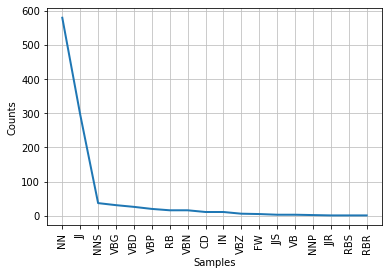

In [120]:
#Named Entity Recognition
from nltk import pos_tag
from nltk import ne_chunk
import matplotlib.pyplot as plt
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

tags = pos_tag(new_text_glob)
chunk = ne_chunk(tags)

#print(chunk)

tags_freq = FreqDist(tag for (word, tag) in chunk)
print(tags_freq.most_common())
tags_freq.plot()
plt.show()

In [11]:
#Establishing rules for chunking
from nltk.chunk import *
from nltk.chunk.util import *
from nltk.chunk.regexp import *

rules = r'''
NP: {<JJ><NN.>}
    {<VB.>*<RB>}
    {<NN><NN.>+}
    {<VP><NN.>+}
    {<NN.><RB>+}
    {<NNP>+}
    {<NN><NN>}
    '''
chunkparse = RegexpParser(rules)
result = chunkparse.parse(tags)
print(result)
result.draw()
#print(tags)
#nouns = noun for noun in result if tags == "NN"

(S
  liraglutide/JJ
  ameliorates/VBZ
  lipotoxicity-induced/JJ
  oxidative/JJ
  stress/NN
  activating/VBG
  nrf2/JJ
  (NP pathway/NN hepg2/NN)
  cell/NN
  mitochondrial/JJ
  (NP dna/NN segregation/NN)
  (NP replication/NN restrict/NN)
  transmission/NN
  detrimental/JJ
  (NP mutation/NN onset/NN)
  hippocampal/JJ
  (NP network/NN aberration/NN)
  (NP memory/NN deficit/NN)
  (NP p301s/NN tau/NN)
  mouse/NN
  associated/VBN
  early/JJ
  (NP gene/NN signature/NN)
  nasa/FW
  (NP twin/NN study/NN)
  effect/NN
  one/CD
  (NP year/NN space/NN)
  long-chain/NN
  fatty/JJ
  acid/NN
  desaturases/VBZ
  elongases/VBZ
  primary/JJ
  hyperparathyroidism/NN
  first/JJ
  (NP manifestation/NN men/NNS)
  2a/CD
  international/JJ
  (NP multicenter/NN study/NN)
  suppression/NN
  inflammasome/JJ
  (NP activation/NN irf8/NN)
  (NP irf4/NN cdc/NN)
  critical/JJ
  cell/NN
  priming/VBG
  (NP senataxin/NN ortholog/NN)
  sen1/JJ
  (NP limit/NN dna/NN)
  rna/VBP
  hybrid/JJ
  (NP accumulation/NN dna/NN)
  d

## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(freq)

tfidfs = pd.DataFrame(data=tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names())

print(tfidfs)

analysis  cancer  cell  data  disease  dna  gene  genetic  genomic  \
0        1.0     0.0   0.0   0.0      0.0  0.0   0.0      0.0      0.0   
1        0.0     1.0   0.0   0.0      0.0  0.0   0.0      0.0      0.0   
2        0.0     0.0   1.0   0.0      0.0  0.0   0.0      0.0      0.0   
3        0.0     0.0   0.0   1.0      0.0  0.0   0.0      0.0      0.0   
4        0.0     0.0   0.0   0.0      1.0  0.0   0.0      0.0      0.0   
5        0.0     0.0   0.0   0.0      0.0  1.0   0.0      0.0      0.0   
6        0.0     0.0   0.0   0.0      0.0  0.0   1.0      0.0      0.0   
7        0.0     0.0   0.0   0.0      0.0  0.0   0.0      1.0      0.0   
8        0.0     0.0   0.0   0.0      0.0  0.0   0.0      0.0      1.0   
9        0.0     0.0   0.0   0.0      0.0  0.0   0.0      0.0      0.0   
10       0.0     0.0   0.0   0.0      0.0  0.0   0.0      0.0      0.0   
11       0.0     0.0   0.0   0.0      0.0  0.0   0.0      0.0      0.0   
12       0.0     0.0   0.0   0.0      0.0 

In [15]:
#It will be helpful for NIH administrators to know which aspects of a certain scientific area are most common in publications and which are least common. For example if we know that "human" is the most common term in a PubMed search of "genomics" publications, then we can learn that there is a strong human emphasis in genomic research.

## 8) What is your _y_-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?

In [16]:
#How many times a word is used in publication abstract/titles.